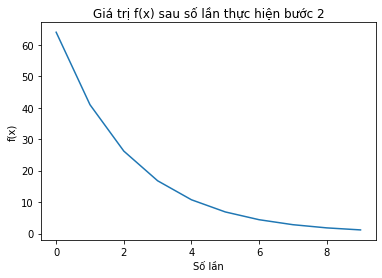

In [2]:
import numpy as np
import matplotlib.pyplot as plt
x = 10
y = []
for i in range(10):
    x = x - 0.1 * 2 * x 
    y.append(x**2)
plt.plot(y)
plt.xlabel('Số lần')
plt.ylabel('f(x)')
plt.title('Giá trị f(x) sau số lần thực hiện bước 2')
plt.show()

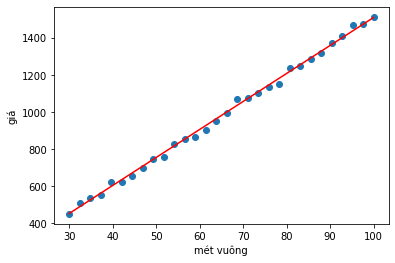

w= [[ 0.19473324]
 [15.10986435]]
Giá nhà cho 50m^2 là :  [755.68795083]


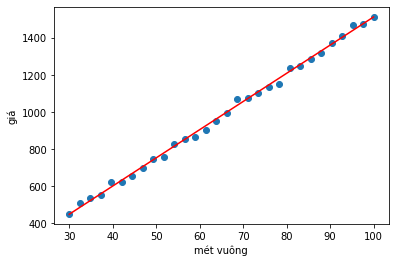

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#đoạn code sinh ra dữ liệu
#numOfPoint = 30
#noise = np.random.normal(0,1,numOfPoint).reshape(-1,1)
#x = np.linspace(30, 100, numOfPoint).reshape(-1,1)
#N = x.shape[0]
#y = 15*x + 8 + 20*noise
#plt.scatter(x, y)
data = pd.read_csv('data_linear.csv').values
N = data.shape[0]
x = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)
plt.scatter(x, y)
plt.xlabel('mét vuông')
plt.ylabel('giá')
x = np.hstack((np.ones((N, 1)), x))
w = np.array([0.,1.]).reshape(-1,1)
numOfIteration = 100
cost = np.zeros((numOfIteration,1))
learning_rate = 0.000001
for i in range(1, numOfIteration):
    r = np.dot(x, w) - y
    cost[i] = 0.5*np.sum(r*r)
    w[0] -= learning_rate*np.sum(r)
    # correct the shape dimension
    w[1] -= learning_rate*np.sum(np.multiply(r, x[:,1].reshape(-1,1)))
#     print(cost[i])
predict = np.dot(x, w)
plt.plot((x[0][1], x[N-1][1]),(predict[0], predict[N-1]), 'r')
plt.show()
print("w=",w)
x1 = 50
y1 = w[0] + w[1] * x1
print('Giá nhà cho 50m^2 là : ', y1)
# Lưu w với numpy.save(), định dạng '.npy'
np.save('weight.npy', w)
# Đọc file '.npy' chứa tham số weight
w = np.load('weight.npy')



# LinearRegression với thư viện sklearn
from sklearn.linear_model import LinearRegression
data = pd.read_csv('data_linear.csv').values
x = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)
plt.scatter(x, y)
plt.xlabel('mét vuông')
plt.ylabel('giá')
# Tạo mô hình hồi quy tuyến tính
lrg = LinearRegression()
# Train mô hình với data giá đất
lrg.fit(x, y)
# Đoán giá nhà đất
y_pred = lrg.predict(x)
plt.plot((x[0], x[-1]),(y_pred[0], y_pred[-1]), 'r')
plt.show()
# Lưu nhiều tham số với numpy.savez(), định dạng '.npz'
np.savez('w2.npz', a=lrg.intercept_, b=lrg.coef_)
# Lấy lại các tham số trong file .npz
k = np.load('w2.npz')
lrg.intercept_ = k['a']
lrg.coef_ = k['b']